In [75]:
## Exercise 3 | Part 1: One-vsall

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

In [76]:
## Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 Input Images of Digit
num_labels = 10         # 10 labels, from 1 to 10
                        # (note that we have mapped "0" to label 10)

In [77]:
def displayData(X, example_width=None):
    # Set exampl_width automatically if not passed in
    if not example_width:
        example_width = int(np.round(np.sqrt(np.size(X, 1))))
    
    if X.ndim == 1:
        X = np.reshape(X, (1, -1))
        
    # Gray Image
    plt.set_cmap('gray')
    
    # Compute rows, cols
    m, n = np.shape(X)
    example_height = int(n / example_width)
    
    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    
    # Between images padding
    pad = 1
    
    # Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad), 
                              pad + display_cols * (example_width + pad)))
    
    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > (m - 1):
                break
            # Copy the patch
            
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex]))
            
            r = pad + j * (example_height + pad)
            c = pad + i * (example_width + pad)
            
            display_array[r:r+example_height, c:c+example_width] = np.reshape(
                X[curr_ex], (example_height, example_width), 
                order='F') / max_val
            
            curr_ex += 1
        if curr_ex > (m - 1):
            break
    
    # Display Image
    h = plt.imshow(display_array)
    
    # Do not show axis
    plt.axis('off')
    
    return h, display_array

Loading and Visualizing Data ...


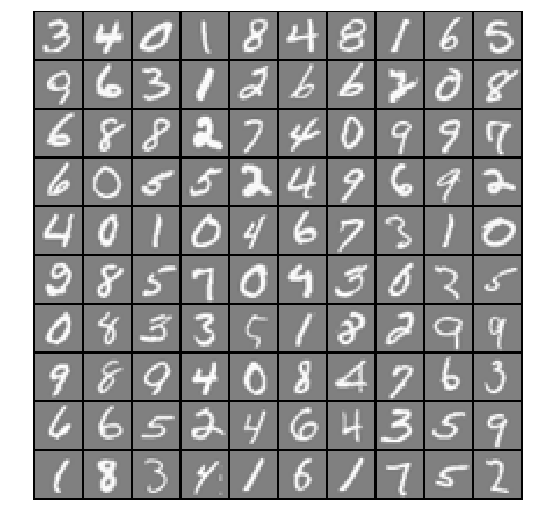

In [78]:
## Part 1: Loading and Visualizing Data
#  We start the exercise by first loading and visualizing the dataset.
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...')

# training data stored in arrays X, y
data = loadmat('../ex3/ex3data1.mat')
X = data['X']
y = data['y'].ravel()
m = np.size(X, 0)

# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100]]

plt.figure(figsize=(9, 9))
displayData(sel)
None

In [79]:
## Part 2a: Vectorize Logistic Regression
#  In this part of the exercise, you will reuse your logistic regression
#  code from the last exercise. You task here is to make sure that your
#  regularized logistic regression implementation is vectorized. After
#  that, you will implement one-vs-all classification for the handwritten
#  digit dataset.
#

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g


def lrCostFunction(theta, X, y, lambda_):
    if X.ndim == 1:
        X = X.reshape(X, (1, -1))
    
    if y.dtype == np.dtype('bool'):
        y = y.astype('int')
        
    m = len(y)
    
    z = np.dot(X, theta)
    h = sigmoid(z)
    
    theta_ = np.r_[0, theta[1:]]
    
    J = (np.dot(-y, np.log(h)) - np.dot(1 - y, np.log(1 - h))) / m
    J += lambda_ * np.sum(theta_**2, axis=-1) / (2 * m)
    
    grad = np.dot(h - y, X) / m
    grad += lambda_ * theta_ / m
    
    return J, grad

In [80]:
# Test case for lrCostFunction
print('\nTesting lrCostFunction() with regularization')

theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.reshape(range(1, 16), (5, 3), order='F') / 10]
y_t = np.array([1, 0, 1, 0, 1]) >= 0.5
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

np.set_printoptions(precision=6)
print('\nCost: {:f}'.format(J))
print('Expected cost: 2.534819')
print('Gradients:')
print(' {} '.format(grad))
print('Expected gradients:')
print(' [ 0.146561 -0.548558  0.724722  1.398003]')


Testing lrCostFunction() with regularization

Cost: 2.534819
Expected cost: 2.534819
Gradients:
 [ 0.146561 -0.548558  0.724722  1.398003] 
Expected gradients:
 [ 0.146561 -0.548558  0.724722  1.398003]


In [81]:
## Part 2b: One-vs-All Training

def oneVsAll(X, y, num_labels, lambda_):
    if X.ndim == 1:
        X = np.reshape(X, (1, -1))

    m, n = np.shape(X)
    
    all_theta = np.zeros((num_labels, n + 1))
    
    # Add ones to the X data matrix
    X = np.c_[np.ones(m), X]
    
    # Set Initial theta
    initial_theta = np.zeros(n + 1)
    
    # Set options for minimize
    optimset = {'disp': True, 'maxiter': 50}
    
    for c in range(num_labels):
        # Run minimize to obtain the optimal theta
        result = minimize(
            lambda t: lrCostFunction(t, X, y==(c+1), lambda_), 
            initial_theta, 
            method='CG', 
            jac=True, 
            options=optimset)
        theta = result['x']
        
        all_theta[c] = theta

    return all_theta

In [82]:
print('\nTraining One-vs-All Logistic Regression...')

lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)


Training One-vs-All Logistic Regression...
         Current function value: 0.013664
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.056008
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061954
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037403
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063764
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.020017
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033850
         Iterations: 50
         Function evaluations: 158
         Gradient evaluations: 158
    

In [83]:
## Part 3: Predict for One-Vs-All

def predictOneVsAll(all_theta, X):
    if X.ndim == 1:
        X = np.reshape(X, (1, -1))

    m = np.size(X, 0)  # (m)
    num_labels = np.size(all_theta, 0)  # (10)
    
    # Add ones to the X data matrix
    X = np.c_[np.ones(m), X]  # (m, 401)
    
    z = np.dot(X, all_theta.T)  # (m, 10)
    h = sigmoid(z)
    
    p = np.argmax(h, axis=-1)  # (m,)
    
    return p + 1

In [84]:
pred = predictOneVsAll(all_theta, X)

print('\nTraining Set Accuracy: {:.1f}'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 95.1
